In this notebook we clean the LAPD Crime Data for analysis

In [1]:
from preprocessing import fetch_data
from utils import DESC_VARIABLES

In [2]:
df = fetch_data()
df

,caseno,uniquenibrno,date_rptd,date_occ,time_occ,area_name,rpt_dist_no,totaloffensecount,group,nibr_description,...,transit_related_crime,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,weapon_desc,uniquevictimno,vict_age,vict_descent,vict_sex,victim_type
0,25151345,25151345_23G_0,2025-08-14,2025-08-13,21:00:00,Devonshire,1781,1,A,484(A) - PC - F - Grand Theft - Theft Of Motor...,...,False,False,False,False,<NA>,25151345_0,45,Filipino,F,Person
1,25161221,25161221_90D_0,2025-08-28,2025-08-28,20:55:00,Devonshire,1753,1,B,23152(A) - VC - M - Dui Alcohol - 90D,...,False,False,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,25154680,25154680_13C_0,2025-08-19,2025-07-05,11:00:00,Foothill,1663,1,A,422(A) - PC - F - Criminal Threats - 13C,...,False,False,False,False,<NA>,25154680_0,23,Hispanic,F,Person
3,25114136,25114136_23H_1,2025-06-22,2025-06-22,12:00:00,Hollywood,668,2,A,484(A) - PC - M - Petty Theft - All Other Larc...,...,False,False,False,False,"Bodily Force - Personal Weapons (hands, feet, ...",25114136_0,24,Black/African American,F,Person
4,25162309,25162309_23G_0,2025-08-30,2025-08-29,23:00:00,Northeast,1184,1,A,484(A) - PC - M - Theft Of Motor Vehicle Parts...,...,False,False,False,False,<NA>,25162309_0,42,Other Asian,F,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251137,25051626,25051626_13B_0,2025-03-27,2025-03-25,19:40:00,Pacific,1407,1,A,243(A) - PC - M - Battery On Person - Simple -...,...,False,False,False,False,"Bodily Force - Personal Weapons (hands, feet, ...",25051626_0,30,Other,M,Person
251138,25148925,25148925_13C_0,2025-08-11,2025-08-11,12:20:00,Devonshire,1743,1,A,422(A) - PC - F - Criminal Threats - 13C,...,False,False,False,False,<NA>,25148925_0,36,Hispanic,F,Person
251139,C259031914,C259031914_290_0,2025-08-10,2025-08-06,21:30:00,Devonshire,1755,1,A,594(B)(1) - PC - F - Vandalism ($400 Or More) ...,...,False,False,False,False,<NA>,C259031914_0,39,Other,F,Person
251140,24067924,24067924_220_0,2024-10-01,2024-09-13,08:00:00,N Hollywood,1516,2,A,459 - PC - F - Burglary - 220,...,False,False,False,False,<NA>,24067924_0,30,White,F,Person


In [3]:
# Check data types and find mixed types
print("Current dtypes:")
print(df.dtypes)
print("\n")

# Check for mixed types by examining each column
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Column '{col}' has mixed types: {unique_types}")
        print(f"Sample values: {df[col].head(10).tolist()}")
        print()

Current dtypes:
caseno                     string[python]
uniquenibrno               string[python]
date_rptd                  datetime64[ns]
date_occ                   datetime64[ns]
time_occ                           object
area_name                        category
rpt_dist_no                        object
totaloffensecount                   Int64
group                              object
nibr_description                 category
crime_against                      object
premis_desc                        object
status_desc                      category
totalvictimcount                    Int64
victim_shot                          bool
domestic_violence_crime              bool
hate_crime                           bool
gang_related_crime                   bool
transit_related_crime                bool
homeless_victim_crime                bool
homeless_suspect_crime               bool
homeless_arrestee_crime              bool
weapon_desc                        object
uniquevictimno    

In [4]:
df.columns

Index(['caseno', 'uniquenibrno', 'date_rptd', 'date_occ', 'time_occ',
       'area_name', 'rpt_dist_no', 'totaloffensecount', 'group',
       'nibr_description', 'crime_against', 'premis_desc', 'status_desc',
       'totalvictimcount', 'victim_shot', 'domestic_violence_crime',
       'hate_crime', 'gang_related_crime', 'transit_related_crime',
       'homeless_victim_crime', 'homeless_suspect_crime',
       'homeless_arrestee_crime', 'weapon_desc', 'uniquevictimno', 'vict_age',
       'vict_descent', 'vict_sex', 'victim_type'],
      dtype='object')

In [5]:
for var in DESC_VARIABLES:
    print("\n")
    print(f"Value counts for variable: {var}")
    print(df[var].value_counts(dropna=False))



Value counts for variable: area_name
area_name
Central        16390
77th Street    16039
Olympic        15708
N Hollywood    14866
Newton         13854
Rampart        13536
Southwest      13439
Hollywood      13375
Southeast      12887
Van Nuys       12399
Topanga        12139
Devonshire     11544
West Valley    11492
Northeast      10840
Pacific        10009
Hollenbeck      9782
Mission         8985
Wilshire        8722
Foothill        8651
West LA         8439
Harbor          6934
Name: count, dtype: int64


Value counts for variable: totaloffensecount
totaloffensecount
1    181912
2     56118
3      8661
4      2124
5       705
6       294
7       175
8        32
9         9
Name: count, dtype: Int64


Value counts for variable: group
group
A       233123
B        13338
<NA>      3569
Name: count, dtype: int64


Value counts for variable: nibr_description
nibr_description
594(B)(1) - PC - F - Vandalism ($400 Or More) - Felony - 290                                                 1

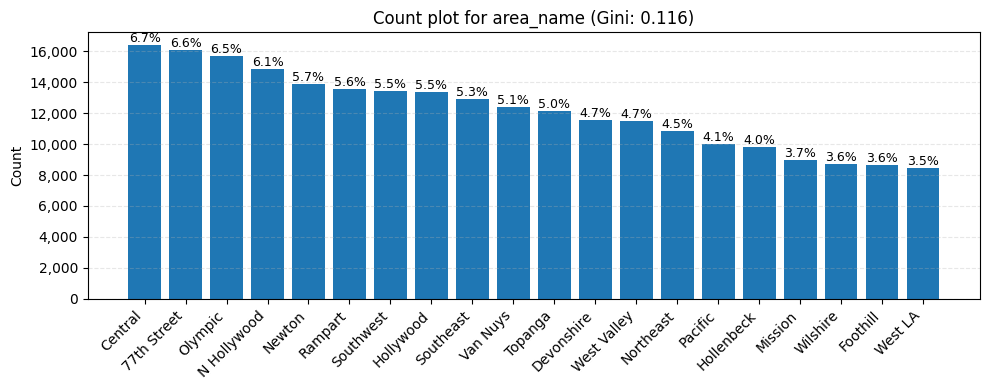

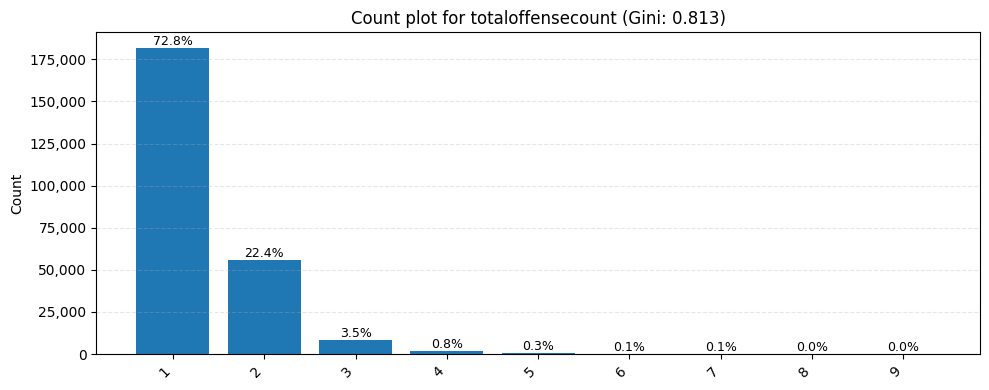

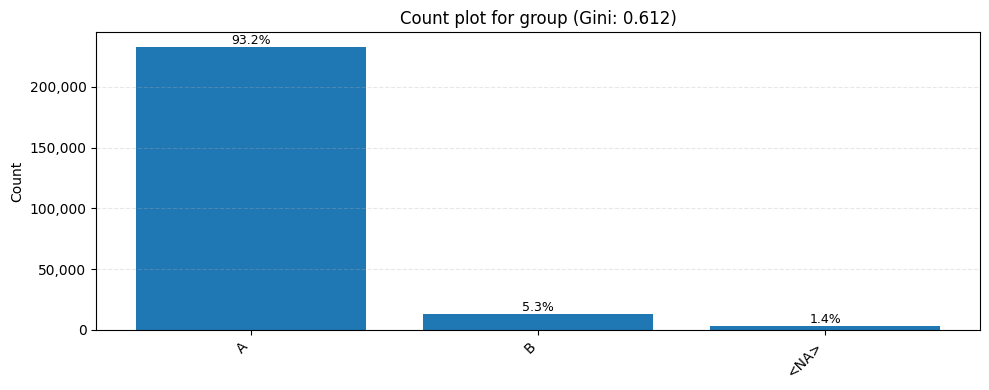

C:\Users\manuz\AppData\Local\Temp\ipykernel_8876\3544991550.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


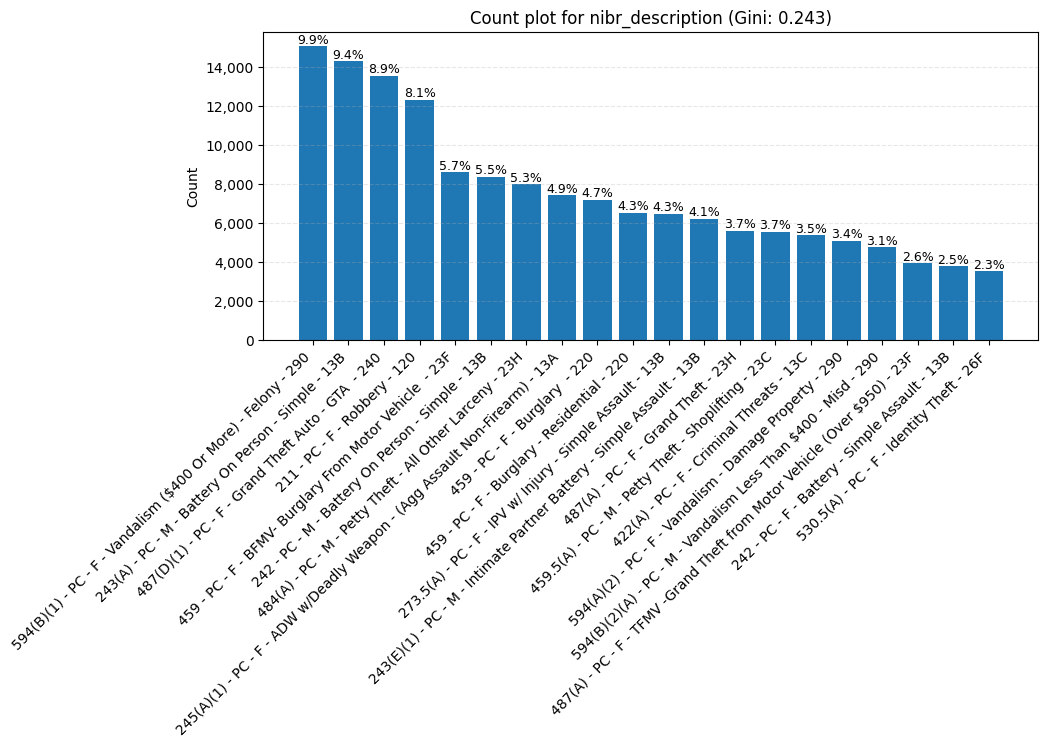

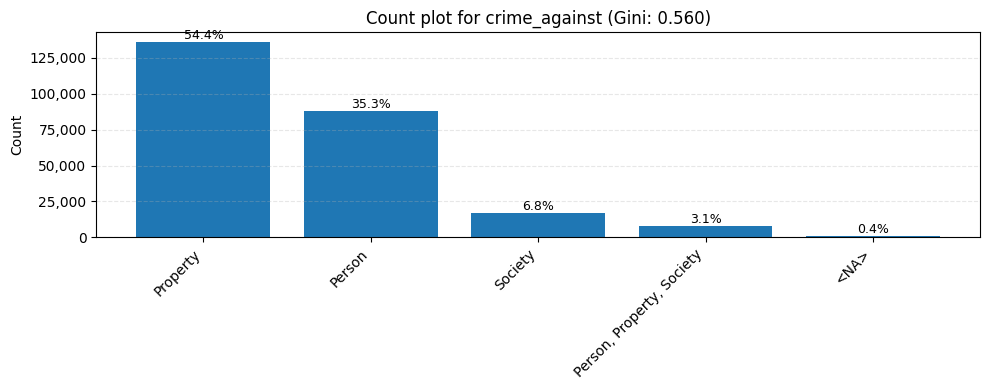

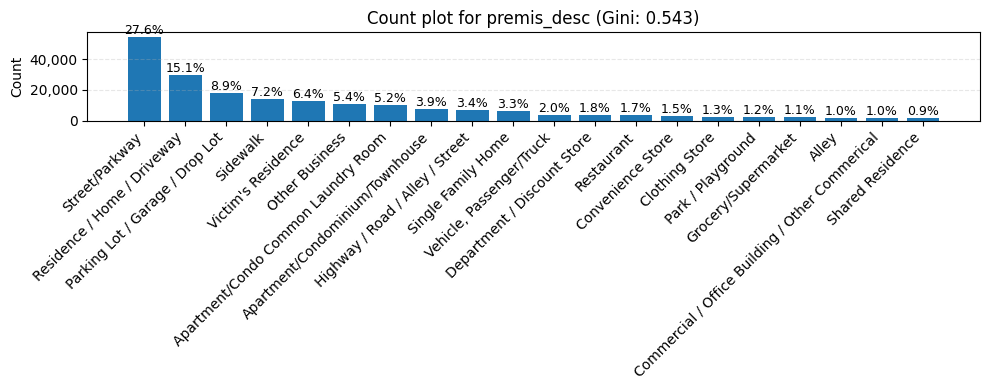

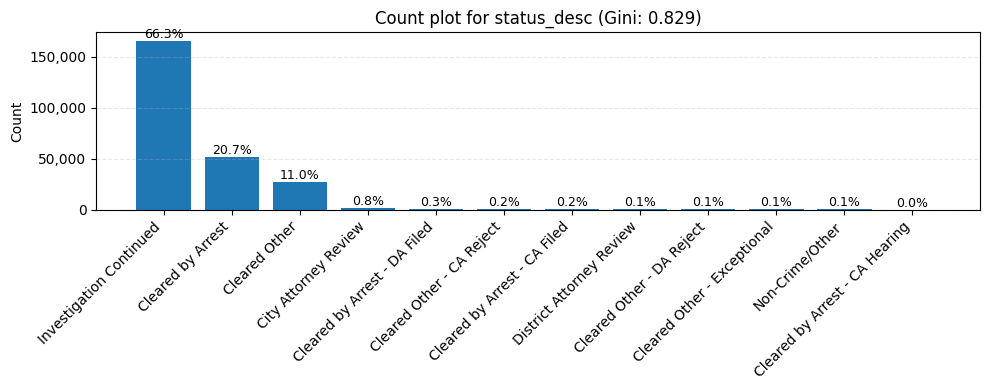

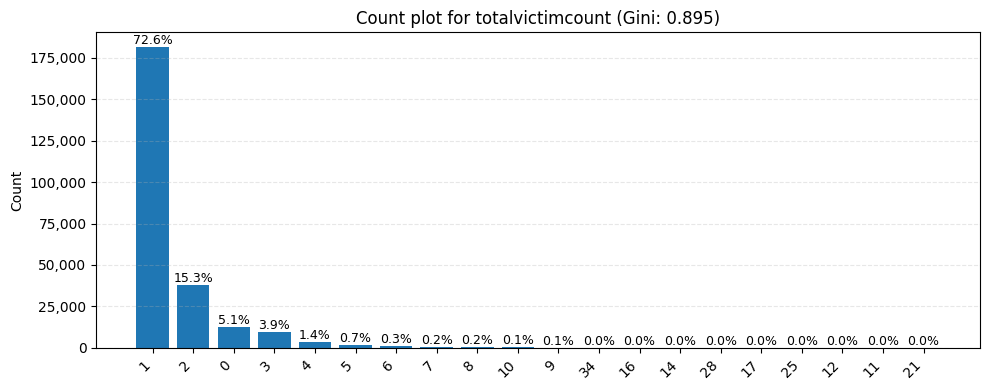

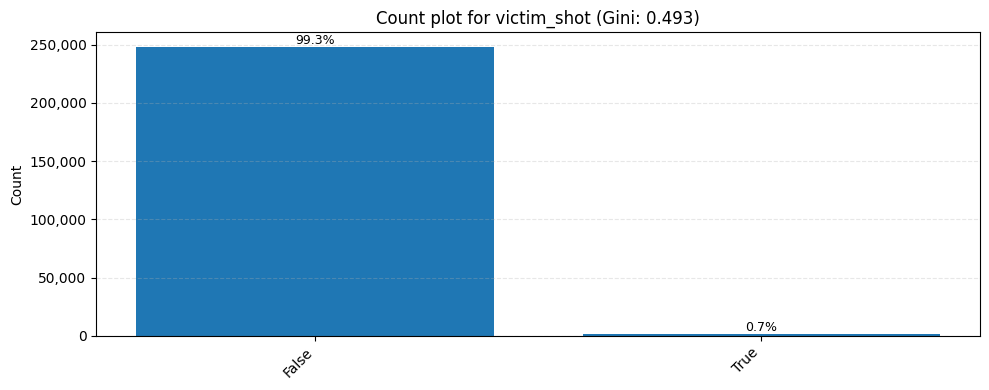

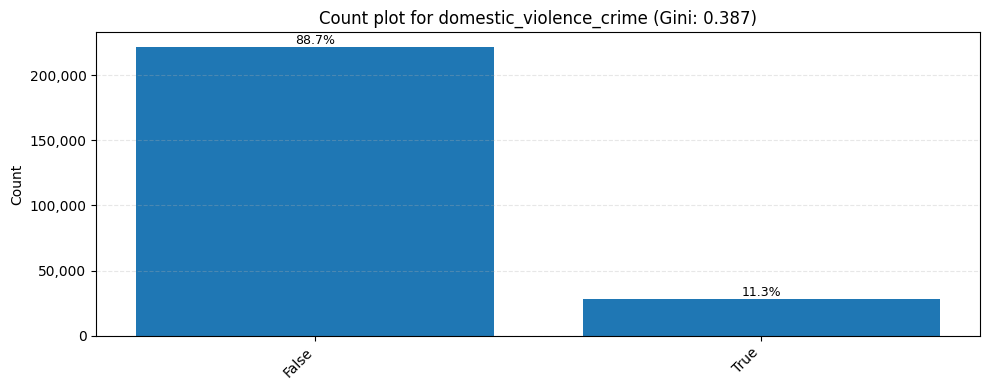

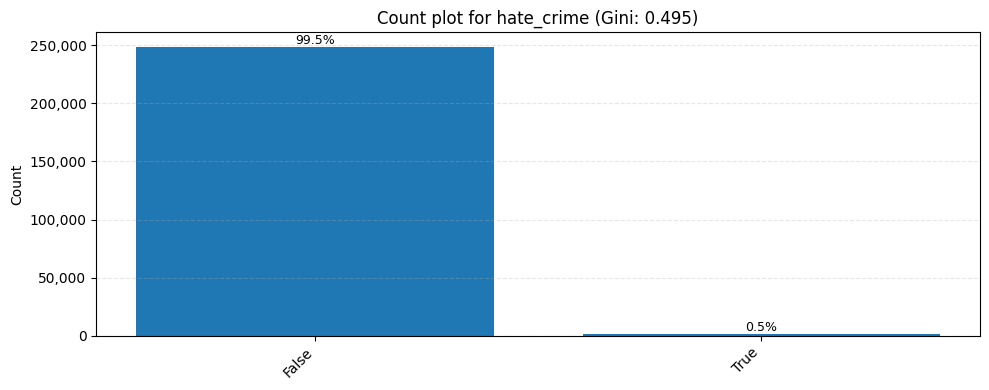

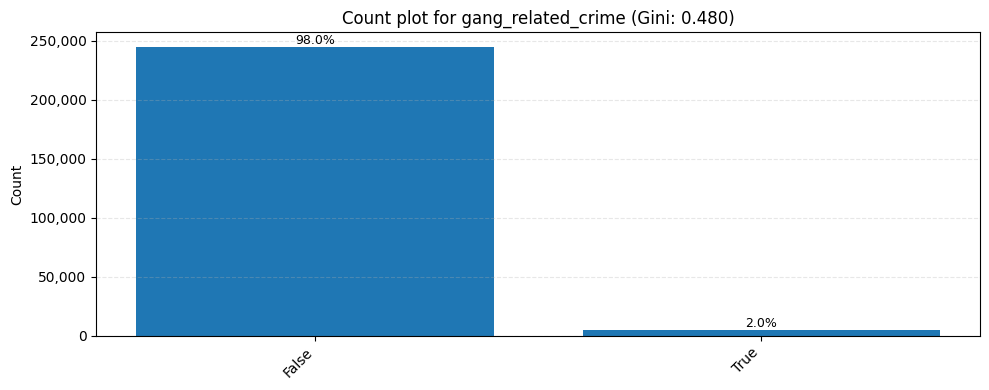

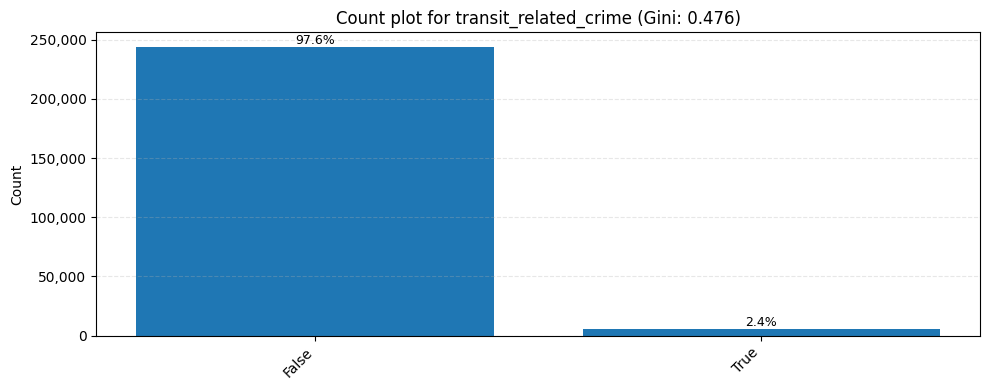

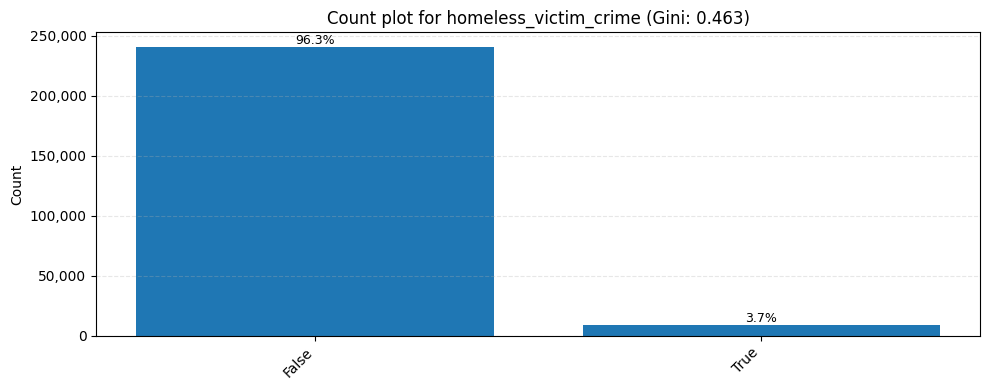

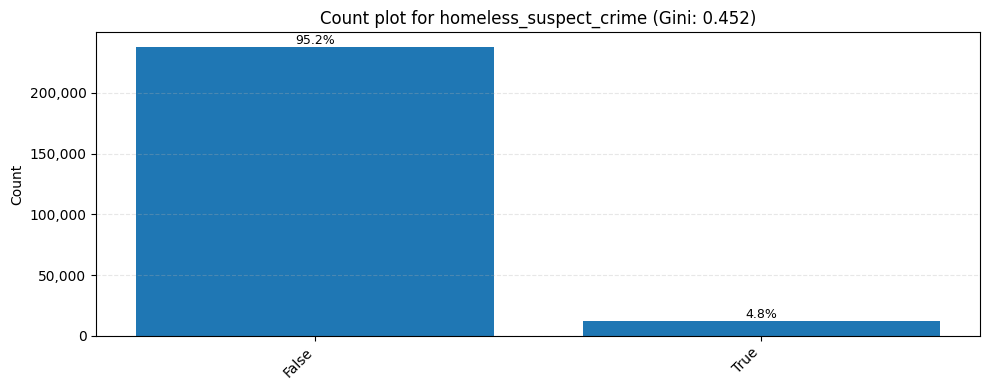

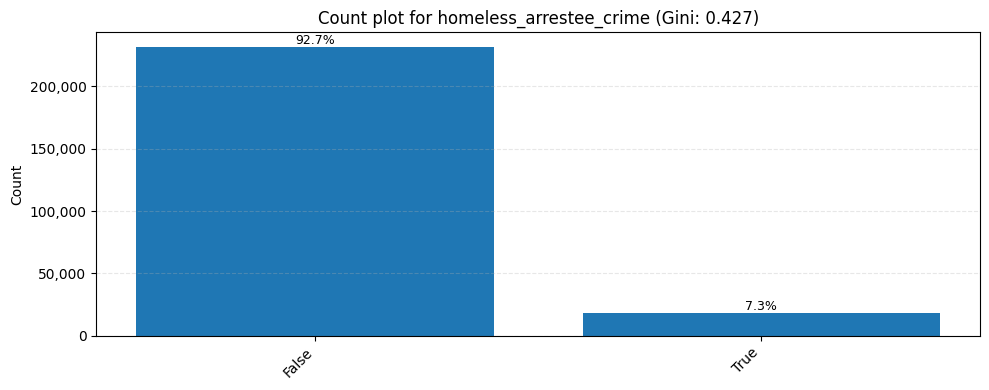

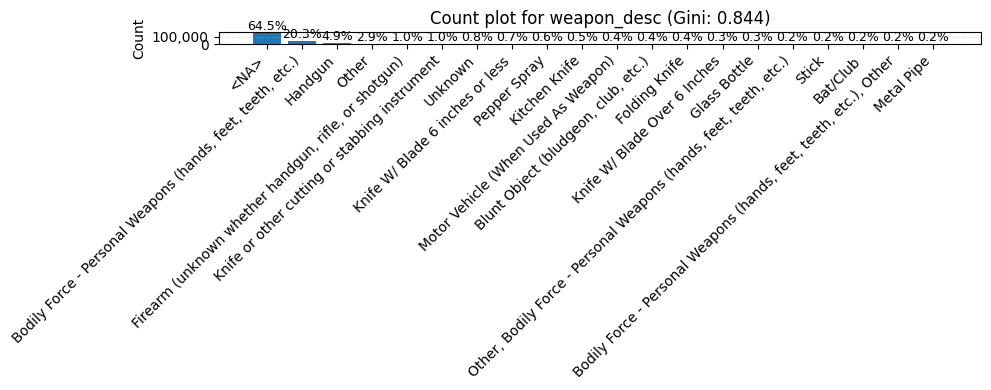

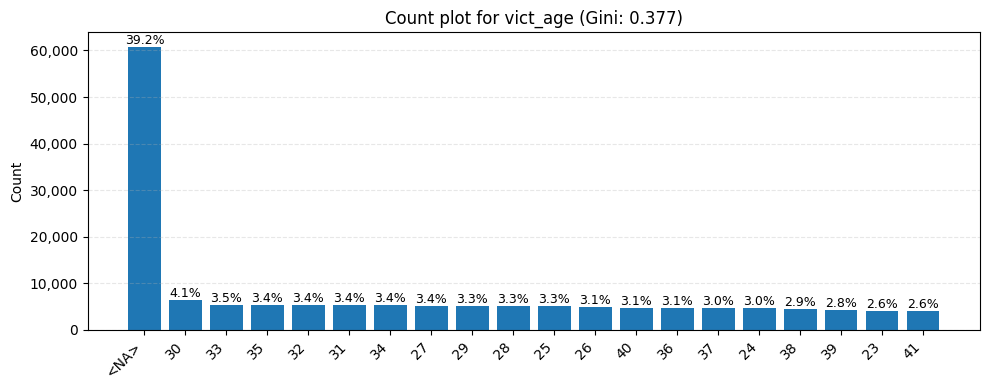

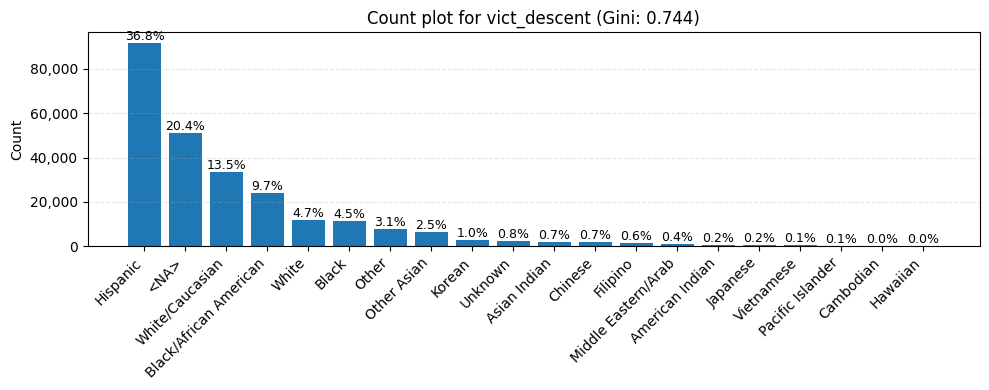

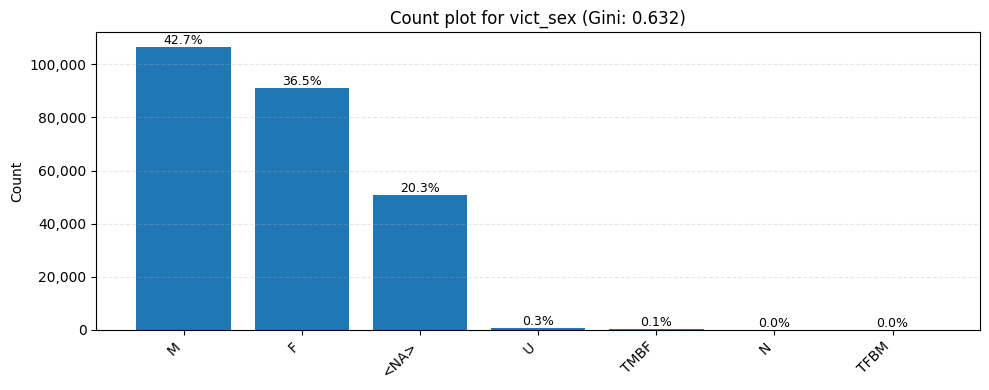

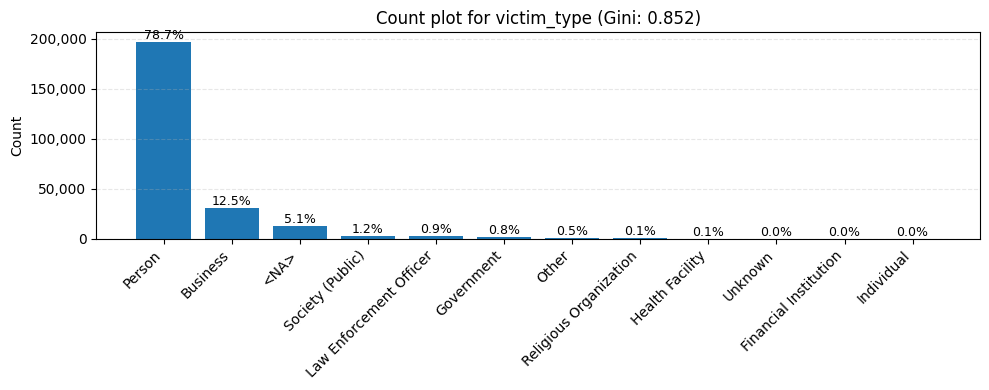

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def gini_coefficient(values):
    """Calculate Gini coefficient (0 = perfectly equal, 1 = perfectly unequal)."""
    sorted_values = np.sort(values)
    n = len(sorted_values)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * sorted_values)) / (n * np.sum(sorted_values)) - (n + 1) / n

for var in DESC_VARIABLES:
    # Get value counts including None
    value_counts = df[var].value_counts(dropna=False)
    
    # Keep top 20 if more than 20 unique values
    if len(value_counts) > 20:
        value_counts = value_counts.head(20)
    
    # Calculate Gini coefficient
    gini = gini_coefficient(value_counts.values)
    
    # Create figure
    plt.figure(figsize=(10, 4))
    ax = plt.bar(range(len(value_counts)), value_counts.values)
    plt.xticks(range(len(value_counts)), 
               [str(x) if x is not None else 'Missing' for x in value_counts.index],
               rotation=45, ha="right")
    plt.title(f"Count plot for {var} (Gini: {gini:.3f})")
    plt.ylabel("Count")
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add percentage labels on top of bars
    total = value_counts.sum()
    for i, (bar, count) in enumerate(zip(ax, value_counts.values)):
        percentage = (count / total) * 100
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()